In [ ]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpnINNZB/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpnINNZB/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpnINNZB/downloaded_packages


In [2]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")

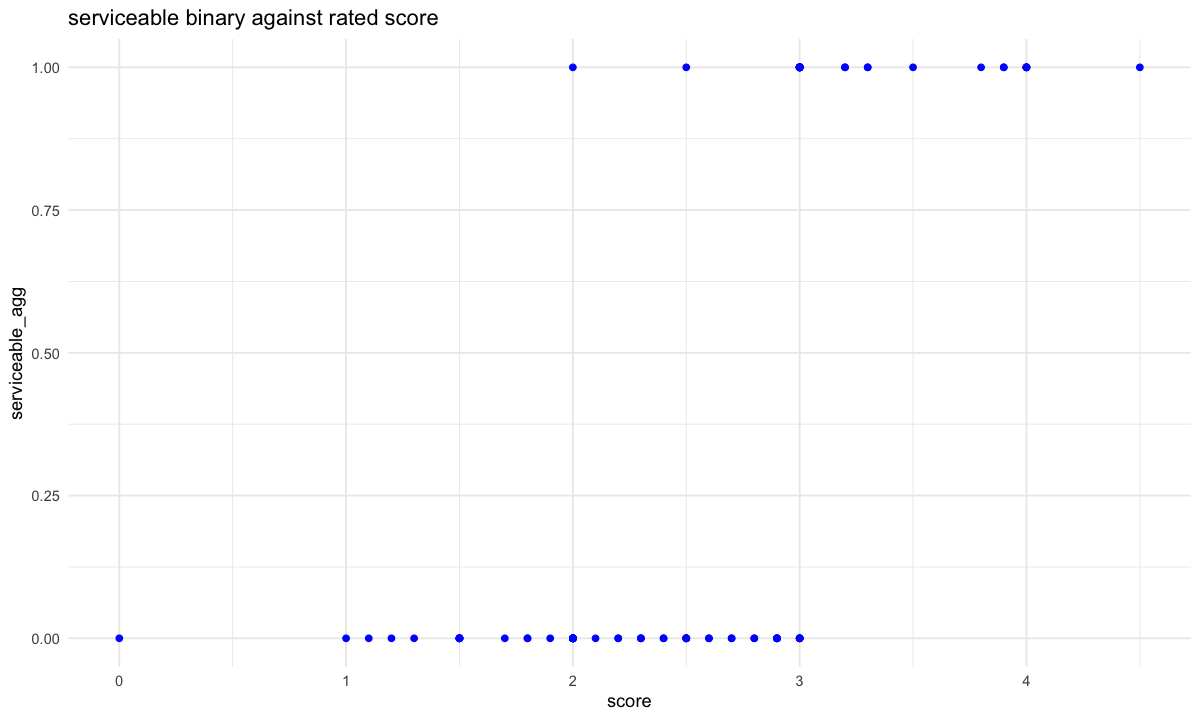

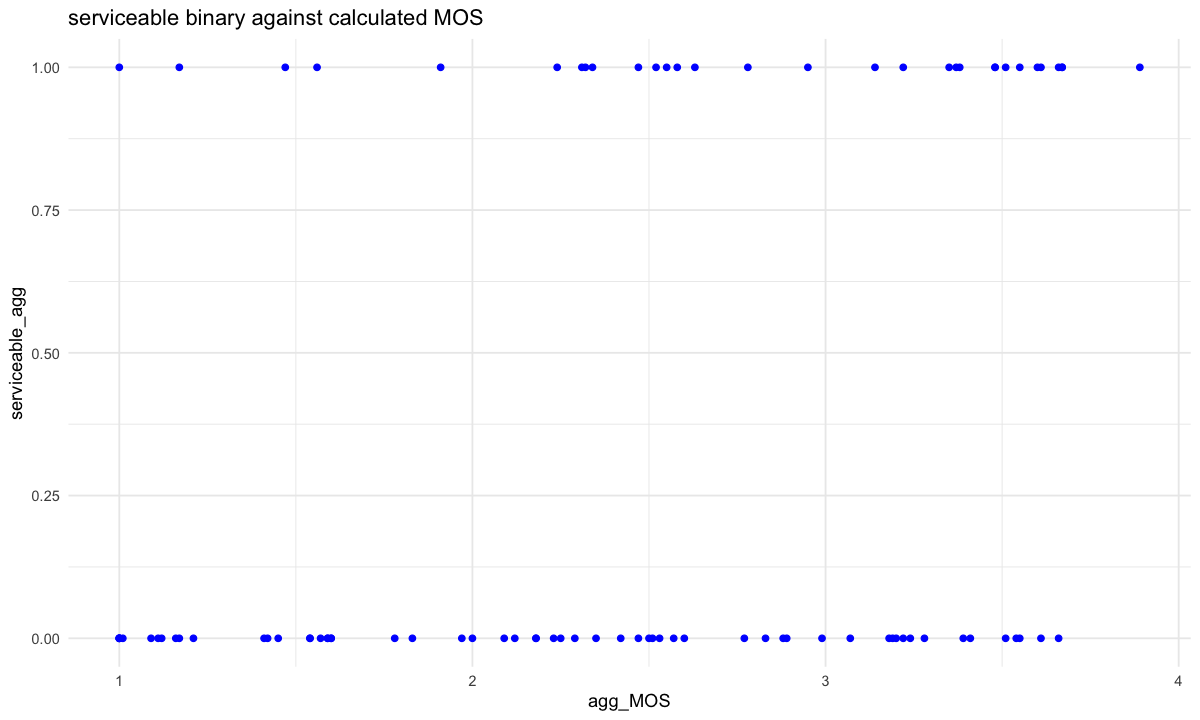

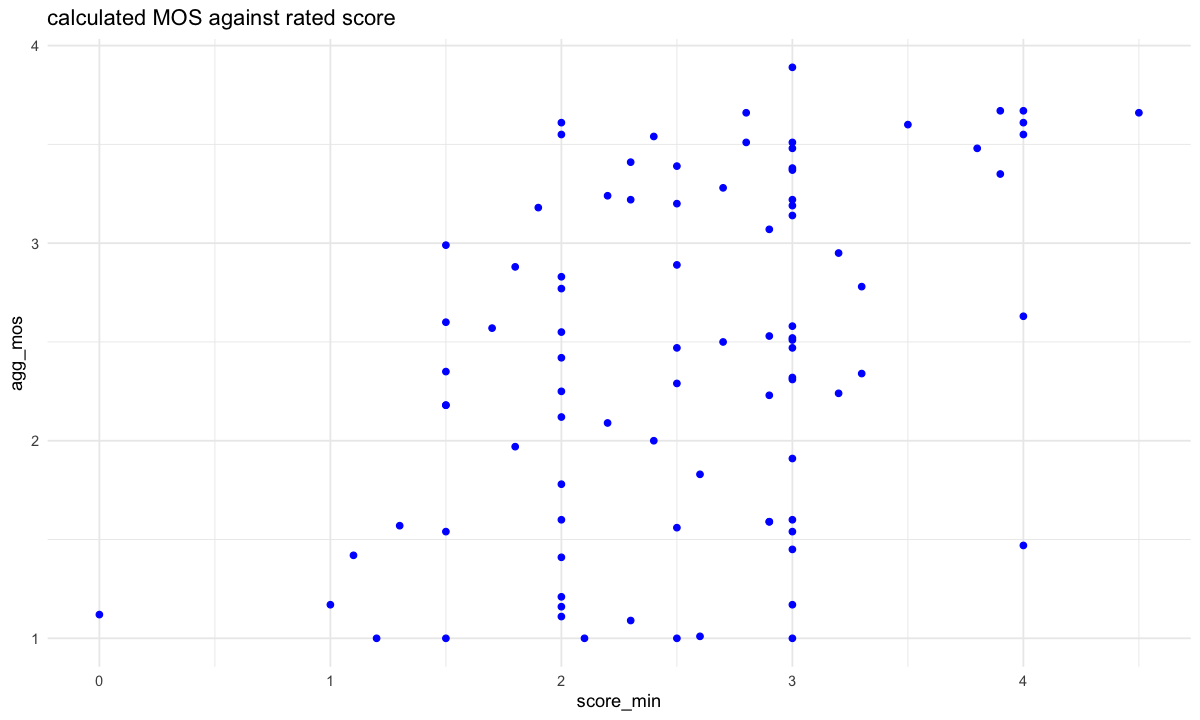

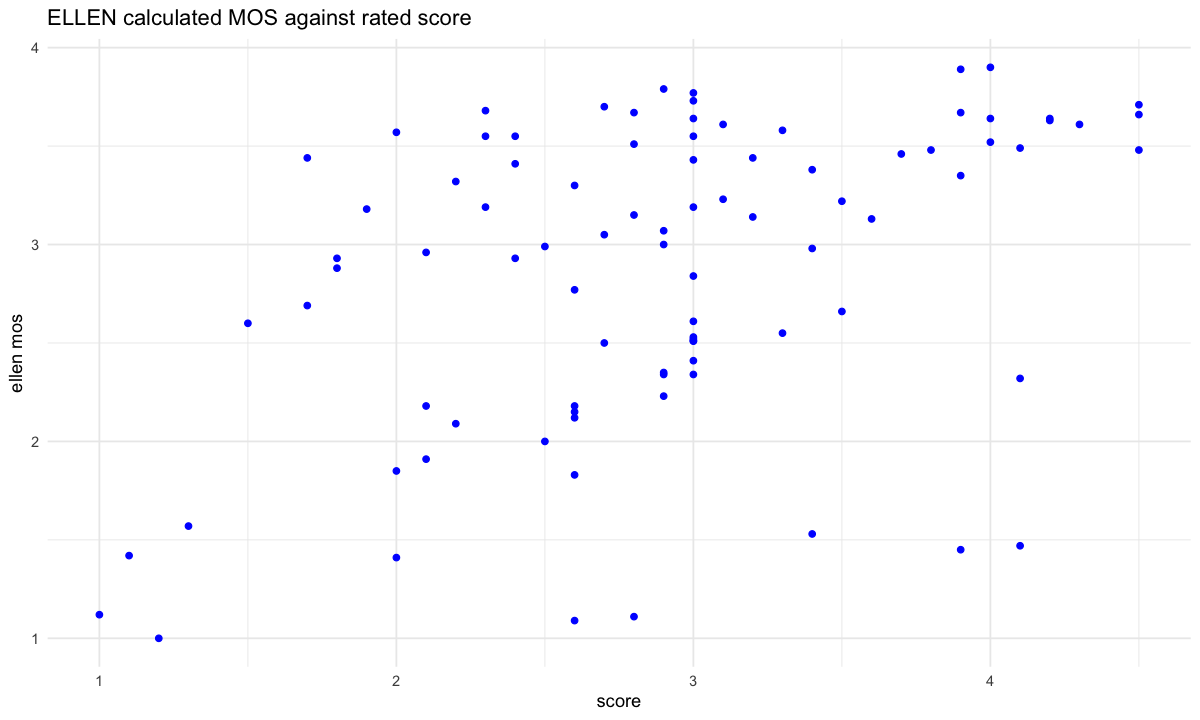

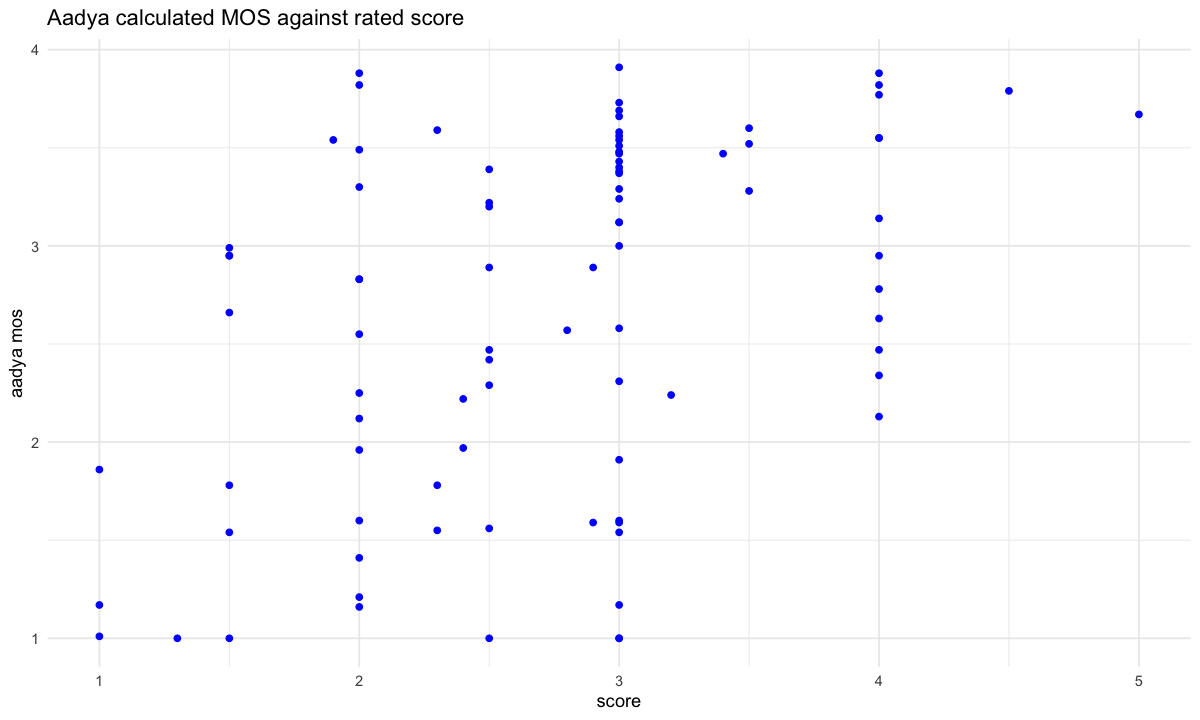

In [3]:

library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(subjective, aes(x = score_min, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "serviceable binary against rated score", x = "score", y = "serviceable_agg") +
  theme_minimal()

ggplot(subjective, aes(x = agg_mos, y = serviceable_agg)) +
  geom_point(color = "blue") +
  labs(title = "serviceable binary against calculated MOS", x = "agg_MOS", y = "serviceable_agg") +
  theme_minimal()

ggplot(subjective, aes(x = score_min, y = agg_mos)) +
  geom_point(color = "blue") +
  labs(title = "calculated MOS against rated score", x = "score_min", y = "agg_mos") +
  theme_minimal()

ggplot(subjective, aes(x = score_ellen, y = e_mos)) +
  geom_point(color = "blue") +
  labs(title = "ELLEN calculated MOS against rated score", x = "score", y = "ellen mos") +
  theme_minimal()

ggplot(subjective, aes(x = score_aadya, y = a_mos)) +
  geom_point(color = "blue") +
  labs(title = "Aadya calculated MOS against rated score", x = "score", y = "aadya mos") +
  theme_minimal()

Warning message in log((subjective$score_min - 1 + epsilon)/(5 - subjective$score_min + :
"NaNs produced"



Call:
lm(formula = score_min ~ agg_mos, data = subjective)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0234 -0.5632  0.0229  0.4998  1.8367 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57555    0.22645   6.958 5.88e-10 ***
agg_mos      0.39984    0.08773   4.558 1.66e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.721 on 88 degrees of freedom
Multiple R-squared:  0.191,	Adjusted R-squared:  0.1818 
F-statistic: 20.77 on 1 and 88 DF,  p-value: 1.659e-05



Call:
lm(formula = transformed_score_min ~ agg_mos, data = subjective)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7597 -0.5816  0.1255  0.6287  2.1669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8557     0.3205  -5.791 1.09e-07 ***
agg_mos       0.5312     0.1236   4.298 4.48e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.003 on 87 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1751,	Adjusted R-squared:  0.1657 
F-statistic: 18.47 on 1 and 87 DF,  p-value: 4.479e-05


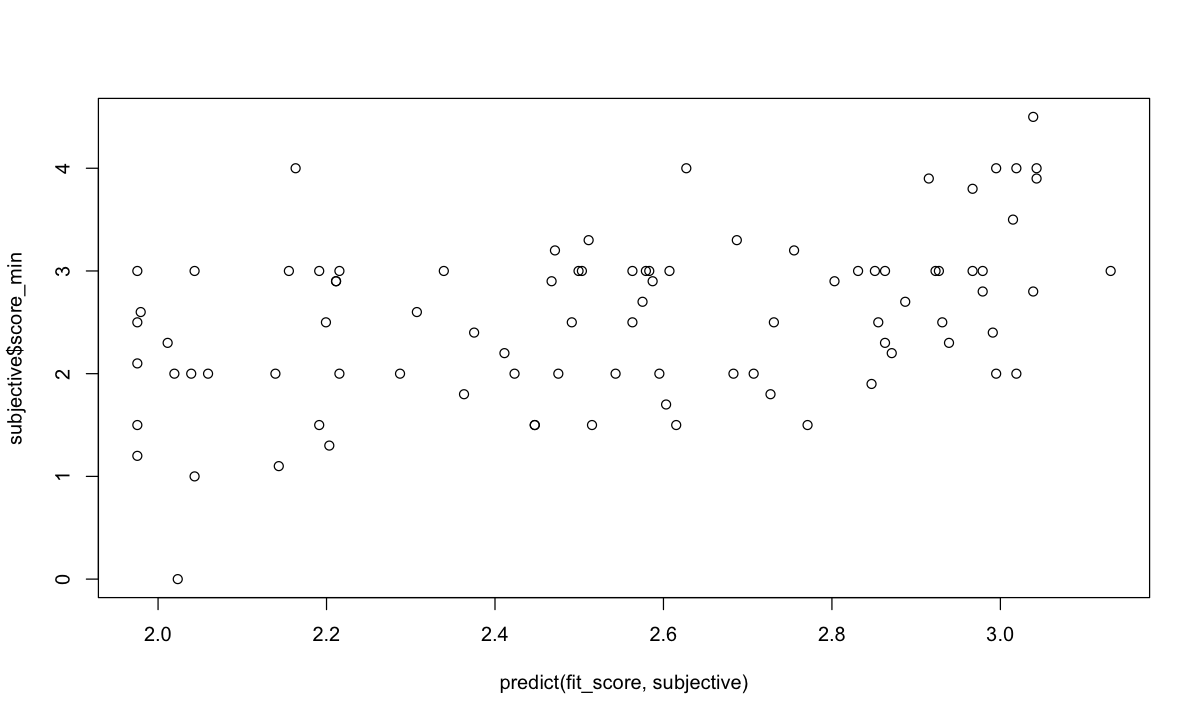

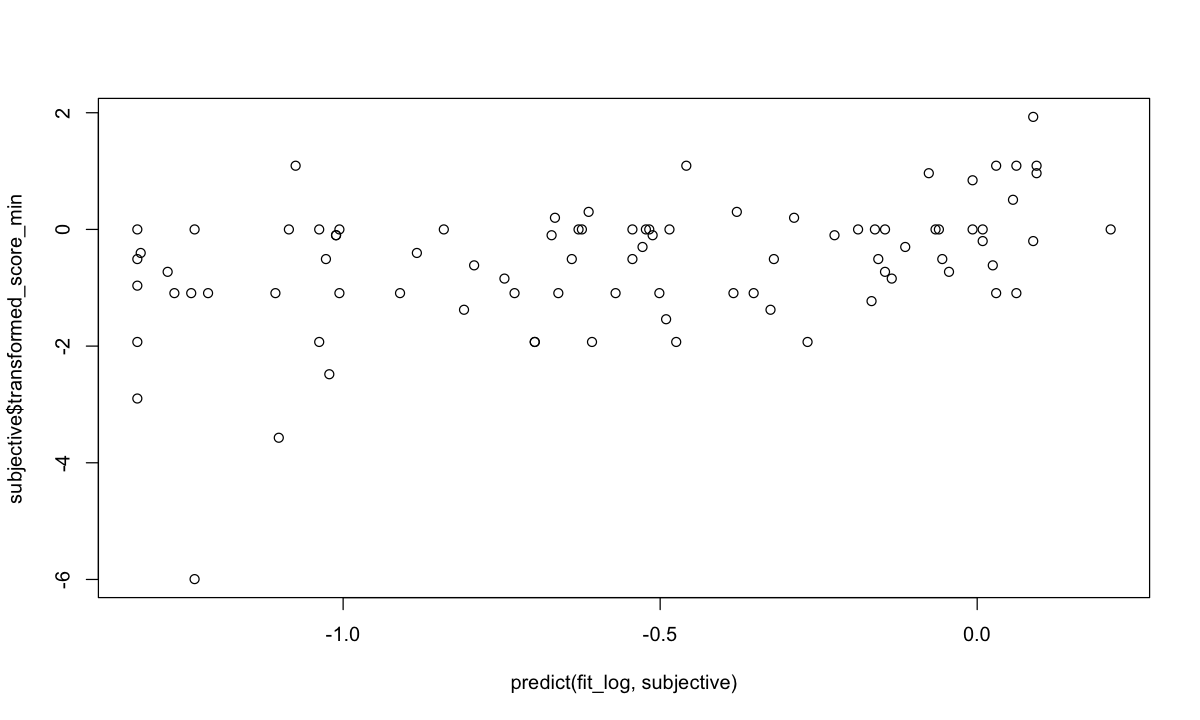

In [9]:
# Small constant to avoid log of zero
epsilon <- 0.01

# Transform agg_mos
subjective$transformed_agg_mos <- log((subjective$agg_mos + epsilon) / (5 - subjective$agg_mos + epsilon))

# Transform score_min
subjective$transformed_score_min <- log((subjective$score_min - 1 + epsilon) / (5 - subjective$score_min + epsilon))

# Fit a normal model
fit_score <- lm(score_min ~ agg_mos, data = subjective)
#fit a log transform model
fit_log <- lm(transformed_score_min ~ agg_mos, data = subjective)


summary(fit_score)
summary(fit_log)
par(bg = "white")
plot(predict(fit_score, subjective), subjective$score_min)
plot(predict(fit_log, subjective), subjective$transformed_score_min)


Call:
glm(formula = serviceable_agg ~ agg_mos, family = binomial, data = subjective)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.8407     0.8090  -3.511 0.000446 ***
agg_mos       0.8671     0.2939   2.950 0.003180 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 115.91  on 89  degrees of freedom
Residual deviance: 105.98  on 88  degrees of freedom
AIC: 109.98

Number of Fisher Scoring iterations: 3


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7023


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 51 18
         1  8 13
                                         
               Accuracy : 0.7111         
                 95% CI : (0.606, 0.8018)
    No Information Rate : 0.6556         
    P-Value [Acc > NIR] : 0.15906        
                                         
                  Kappa : 0.3073         
                                         
 Mcnemar's Test P-Value : 0.07756        
                                         
            Sensitivity : 0.8644         
            Specificity : 0.4194         
         Pos Pred Value : 0.7391         
         Neg Pred Value : 0.6190         
             Prevalence : 0.6556         
         Detection Rate : 0.5667         
   Detection Prevalence : 0.7667         
      Balanced Accuracy : 0.6419         
                                         
       'Positive' Class : 0              
                                         

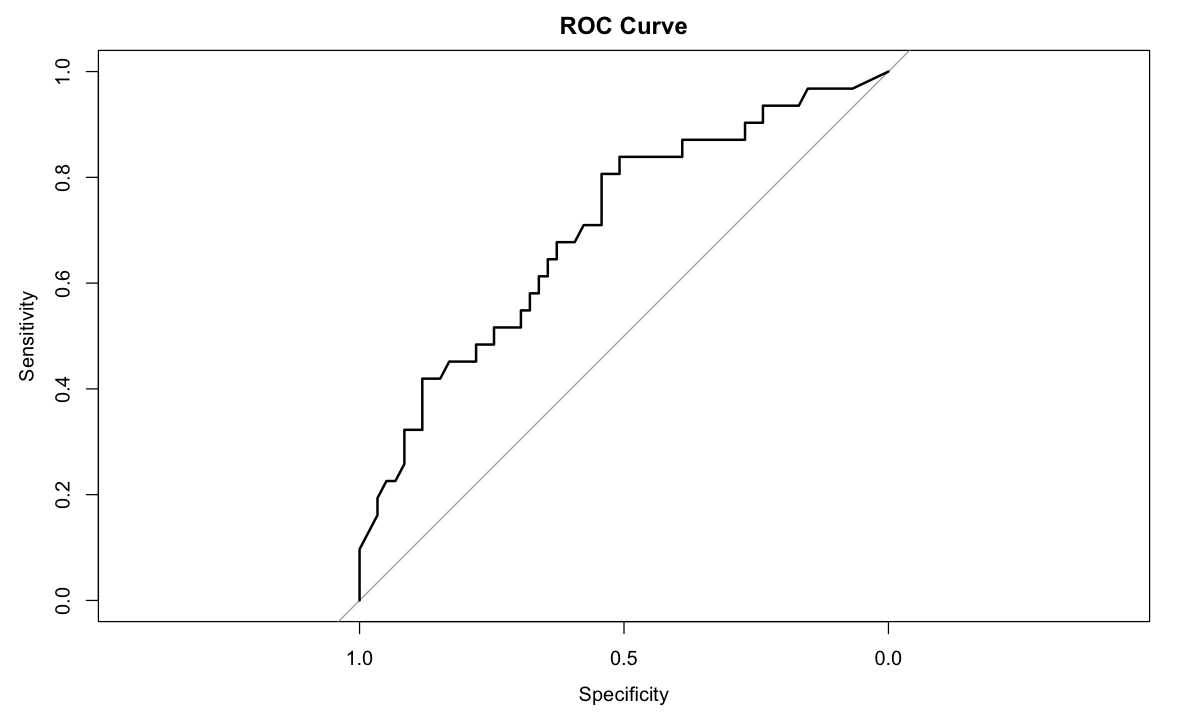

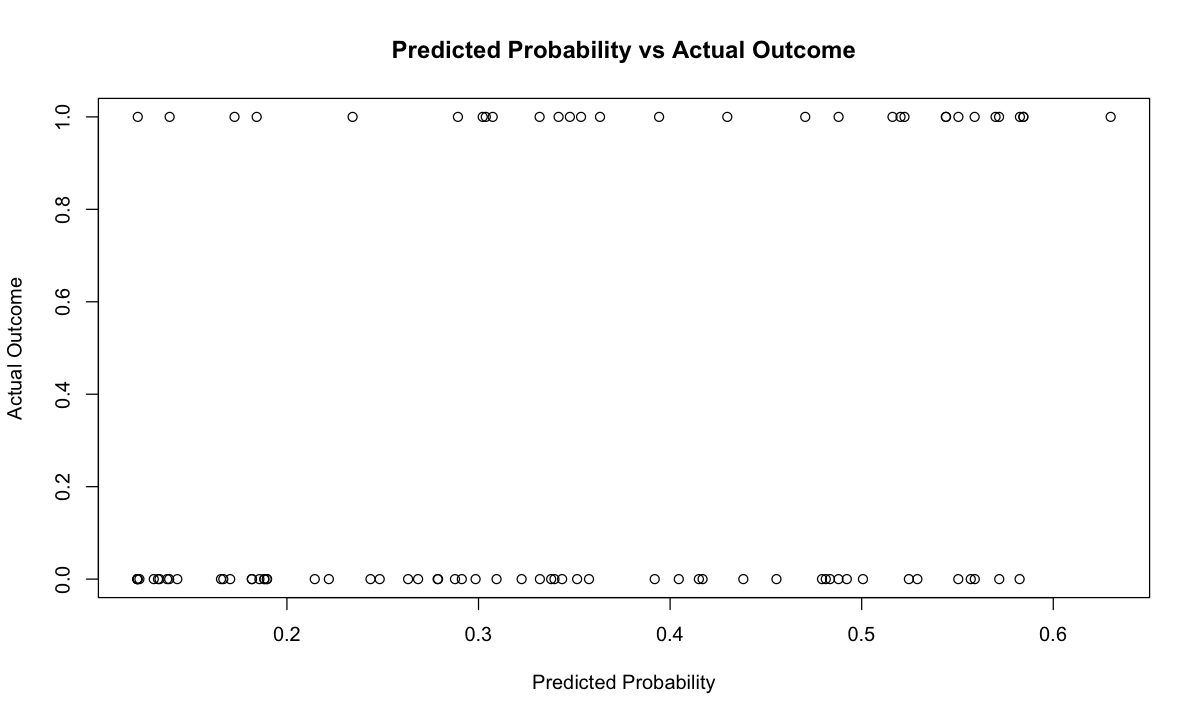

In [16]:
# Load necessary libraries
library(caret)
library(pROC)

# Fit the logistic regression model
fit_logistic <- glm(serviceable_agg ~ agg_mos, data = subjective, family = binomial)
summary(fit_logistic)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_agg, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_agg))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_agg, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")

# log model?

In [ ]:
log_model <- glm(serviceable_agg ~ log(agg_mos), family = binomial, data = subjective)
summary(log_model)
par(bg = "white")
predict_log <- predict(log_model, subjective)
plot(predict_log, subjective$serviceable_agg)

predicted_class <- ifelse(predict_log > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_agg))

# Find threshold MOS value

In [14]:
roc_curve <- roc(subjective$serviceable_agg, subjective$agg_mos)
# Find the optimal threshold
optimal_threshold <- as.numeric(coords(roc_curve, "best", ret = "threshold"))

# Print the optimal threshold
print(optimal_threshold)

subjective$predicted_class <- ifelse(subjective$agg_mos >= optimal_threshold, 1, 0)

# Confusion matrix
table(subjective$serviceable_agg, subjective$predicted_class)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 2.3


   
     0  1
  0 32 27
  1  6 25

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7519


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 40 12
         1 13 25
                                          
               Accuracy : 0.7222          
                 95% CI : (0.6178, 0.8115)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : 0.006028        
                                          
                  Kappa : 0.4286          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.7547          
            Specificity : 0.6757          
         Pos Pred Value : 0.7692          
         Neg Pred Value : 0.6579          
             Prevalence : 0.5889          
         Detection Rate : 0.4444          
   Detection Prevalence : 0.5778          
      Balanced Accuracy : 0.7152          
                                          
       'Positive' Class : 0               
                                    

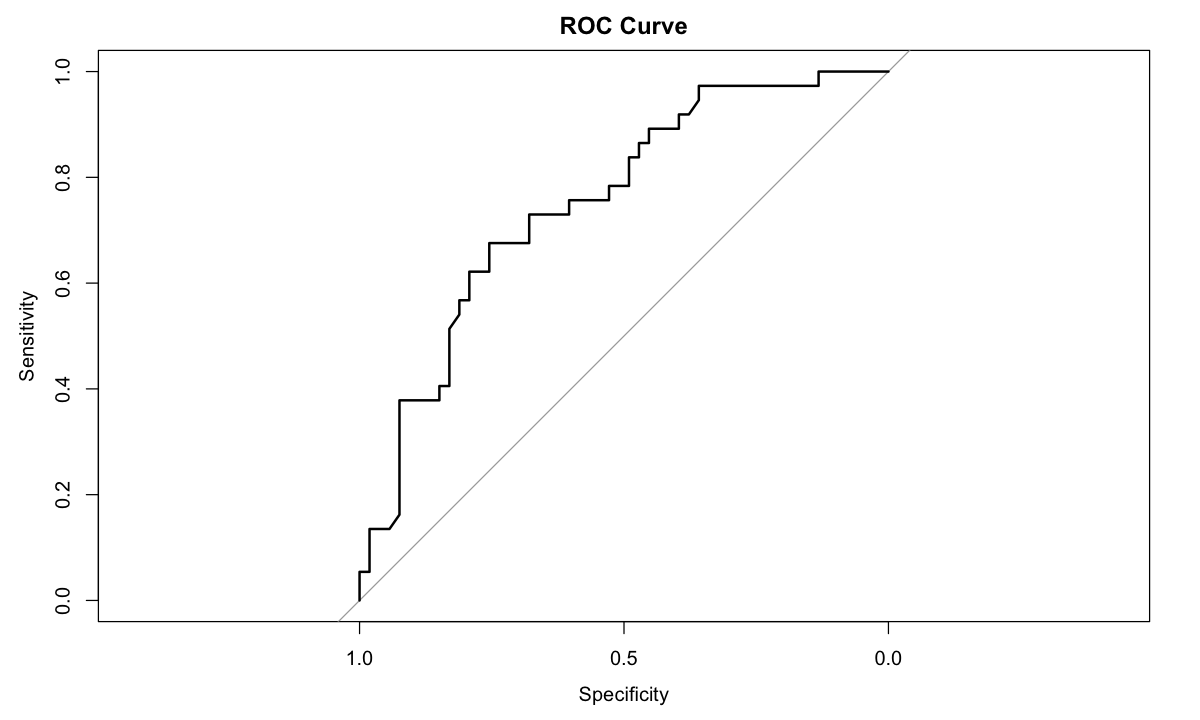

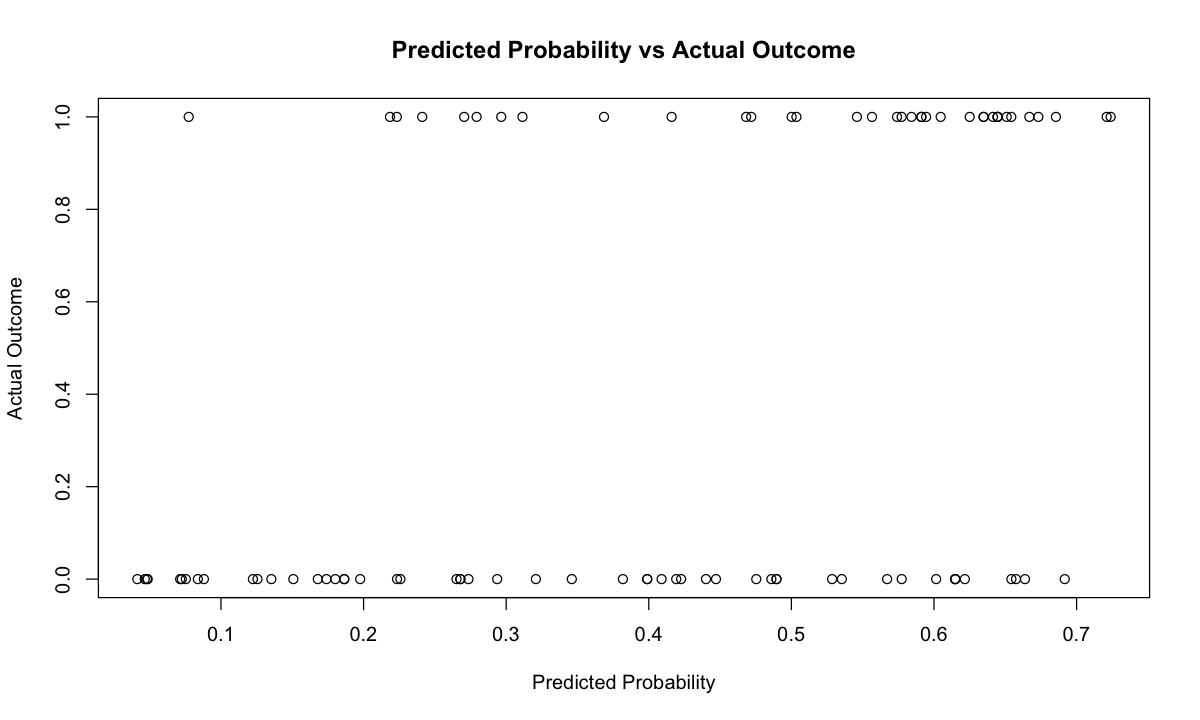

In [45]:
# Fit the logistic regression model
fit_logistic <- glm(serviceable_ellen ~ e_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_ellen, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_ellen))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_ellen, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6925


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 23 13
         1 19 35
                                          
               Accuracy : 0.6444          
                 95% CI : (0.5365, 0.7426)
    No Information Rate : 0.5333          
    P-Value [Acc > NIR] : 0.02167         
                                          
                  Kappa : 0.2793          
                                          
 Mcnemar's Test P-Value : 0.37676         
                                          
            Sensitivity : 0.5476          
            Specificity : 0.7292          
         Pos Pred Value : 0.6389          
         Neg Pred Value : 0.6481          
             Prevalence : 0.4667          
         Detection Rate : 0.2556          
   Detection Prevalence : 0.4000          
      Balanced Accuracy : 0.6384          
                                          
       'Positive' Class : 0               
                                    

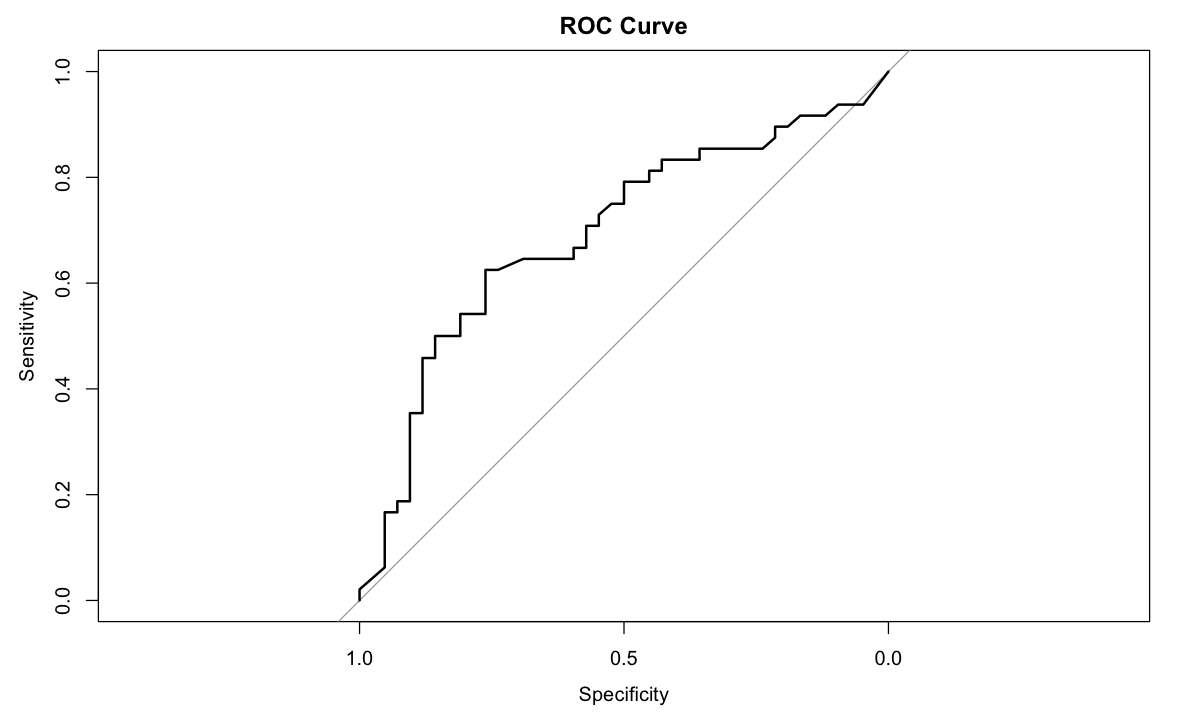

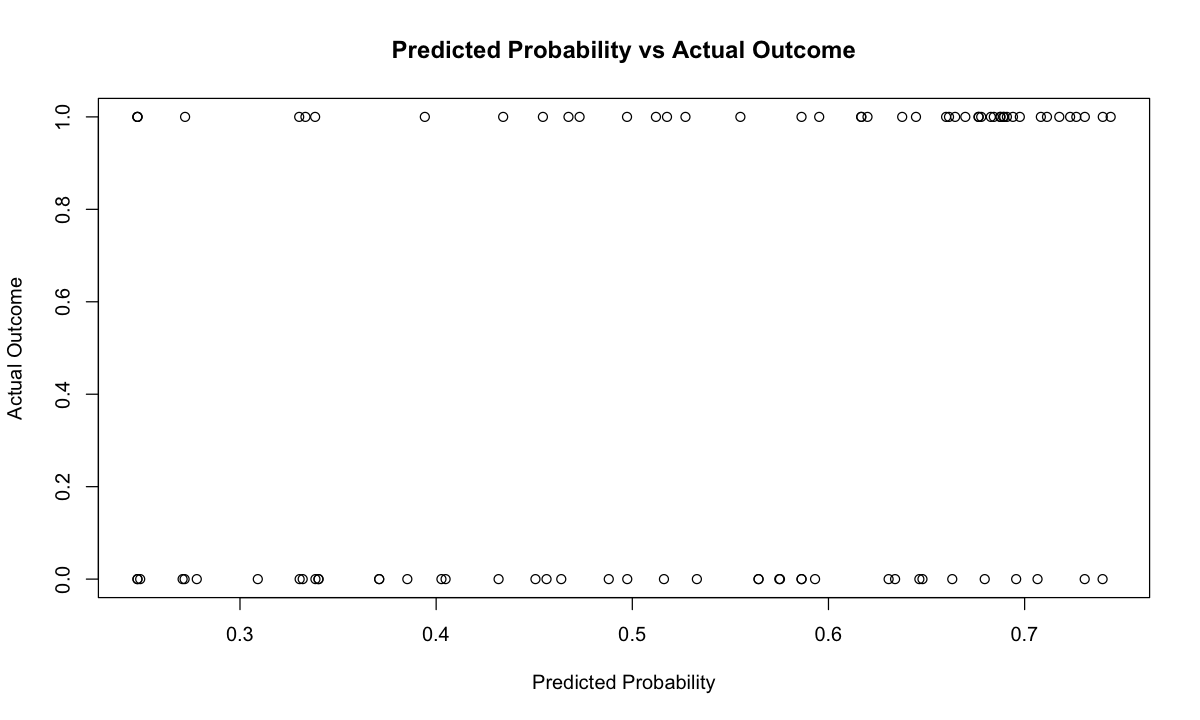

In [46]:
# Fit the logistic regression model
fit_logistic <- glm(serviceable_aadya ~ a_mos, data = subjective, family = binomial)

# Get predictions
predictions <- predict(fit_logistic, subjective, type = "response")

# Plot the ROC curve
par(bg = "white")
roc_curve <- roc(subjective$serviceable_aadya, predictions)
plot(roc_curve, main = "ROC Curve")
auc_value <- auc(roc_curve)
print(auc_value)

# Print confusion matrix
predicted_class <- ifelse(predictions > 0.5, 1, 0)
confusionMatrix(as.factor(predicted_class), as.factor(subjective$serviceable_aadya))

# Plot with jitter to visualize overlapping points
par(bg = "white")
plot(jitter(predictions), subjective$serviceable_aadya, 
     xlab = "Predicted Probability", ylab = "Actual Outcome", 
     main = "Predicted Probability vs Actual Outcome")